In [1]:
import sys
import os
import re
import copy
import numpy as np
import random
import itertools
from typing import List, Optional 
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# load the various FastSim libraries
sys.path.insert(0, '../MATHUSLA_FastSim/')
import DetectorSimulation.Detector as Detector
import DetectorSimulation.Particle as Particle
import DetectorSimulation.Vertex as Vertex
import DetectorSimulation.lorentz_transformation as lt
import DetectorSimulation.llp_gun as llp_gun
## depending on which fvs are used load a different specialized llp gun (llp_gun_new) (built on top of llp_gun)
import DetectorSimulation.llp_gun_new as lg
## NOTE: the various hadronic functions in llp_gun_new must be updated with the correct path of the LLP hadronic decay 
## 4-vector files depending on the type of analysis 

## These hadronic functions are almost the same but were separated into different functions for ease of use with the 
## different LLP analyses - but should be very easy to update them for any new analysis that need be done

# load helper function library for later
from Helpers.functions import *

In [2]:
def initiate_detector(param_card = '../MATHUSLA_FastSim/param_card_CDR.txt'):
    path_to_param_card = join(os.getcwd(), param_card)
    detector_benchmark = Detector.Detector(path_to_param_card)
    detector_benchmark.clear_detector()
    return detector_benchmark

In [4]:
param_card = '../MATHUSLA_FastSim/param_card_CDR.txt'
path_to_param_card = join(os.getcwd(), param_card)

In [13]:
detector_benchmark = Detector.Detector(path_to_param_card)
detector_benchmark.clear_detector()

In [4]:
detector_benchmark = initiate_detector()

In [5]:
detector_benchmark.decay_volume()

250000.0

In [4]:
#Make a particle 
#Particles have a position, 4 momenta, pid, and mass

position = (-20, 100, 30)
momentum = (100, 20,30,40)
pid = 13
mass = 20 #GeV

particle = Particle.Particle(position, momentum, pid, mass)

In [5]:
#Put the particle in the detector
detector_benchmark.new_particle_event(particle)

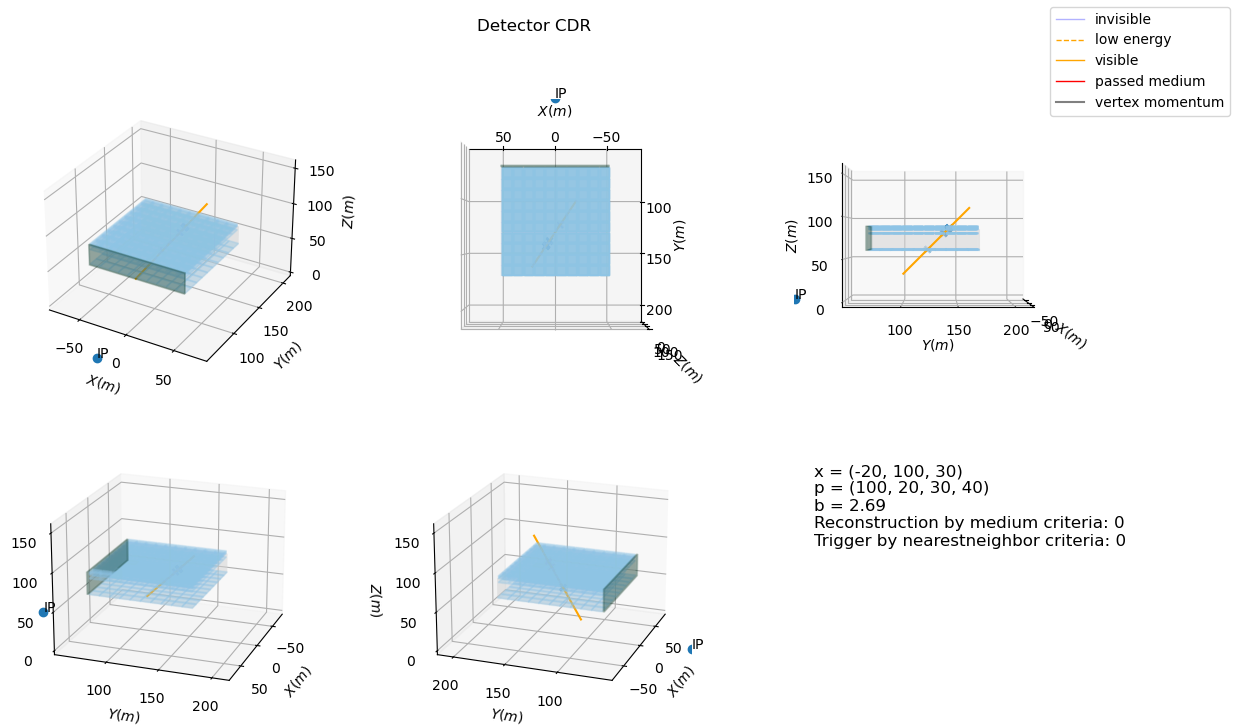

In [6]:
#This is the display stuff
filename = join(os.getcwd(), "testimage")
detector_benchmark.detector_display(filename, show=True)

In [7]:
particle = detector_benchmark.return_current_particle()

In [10]:
particle.particle.momentum

array([100,  20,  30,  40])

In [25]:
print("Four Layers?", detector_benchmark.track_reconstructed(recon_criteria = 'medium'))

print('Trigger?', detector_benchmark.event_pass_trigger())

Four Layers? 1
Trigger? 0


In [11]:
detector_benchmark.clear_detector()

In [12]:
position = (0,120,70)
four_p = (100, 0, 100, 60)
pid = 1023

daughter1 = Particle.Particle(position, (6, 0.2, -2.1, 3.7), 13, 1)
daughter2 = Particle.Particle(position, (0.7, 0, 0.3, 0.4), 211, 1)
daughter3 = Particle.Particle(position, (2, 0.6, 1, -0.2), 13, 1)

vertex = Vertex.Vertex(position, momentum, pid, 
                       [daughter1, daughter2, daughter3], 
                       mass = 5)

In [13]:
detector_benchmark.new_vertex_event(vertex)

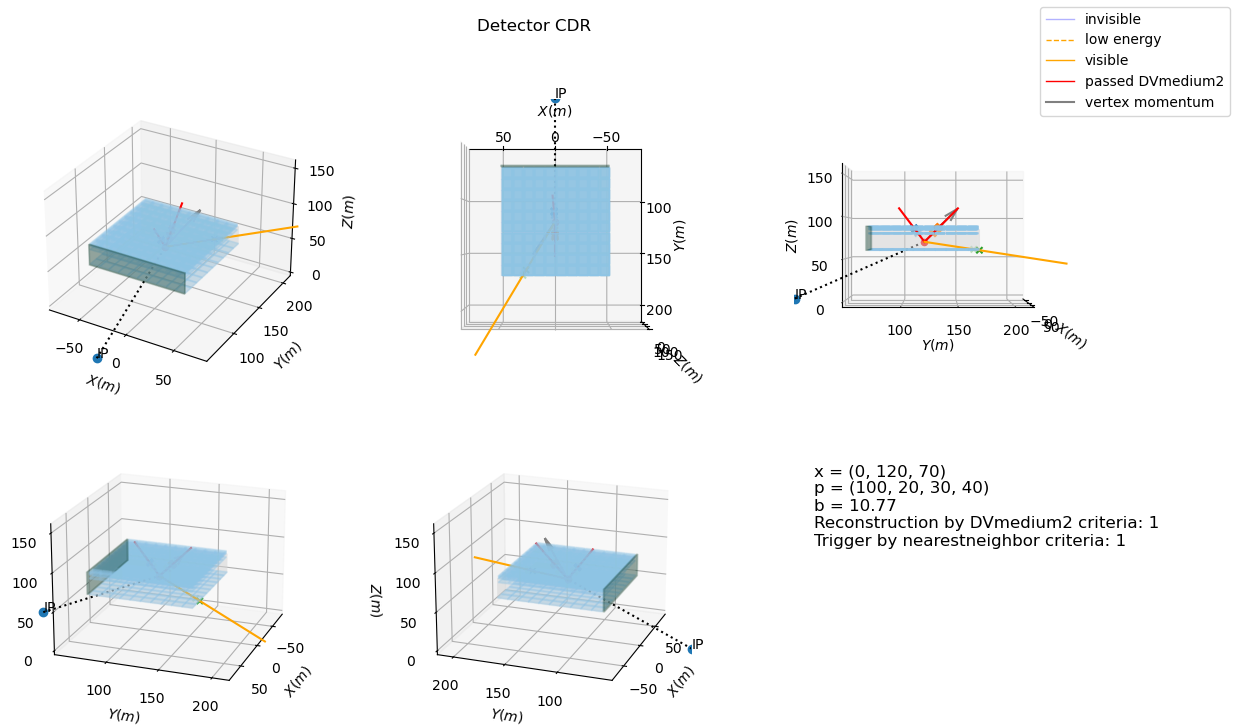

In [14]:
filename = join(os.getcwd(),'first_vertex')
detector_benchmark.detector_display(filename, show = True)

In [18]:
vert = detector_benchmark.return_current_vertex()

In [33]:
vert.decay_product

AttributeError: 'DetectorVertex' object has no attribute 'decay_product'

In [31]:
vert.position

AttributeError: 'DetectorVertex' object has no attribute 'position'

In [30]:
print(vert)

Vertex position: [  0 120  70], momentum: [100  20  30  40]
Final state particles: 
Particle PID: 13, position: [  0 120  70], momentum: [ 6.   0.2 -2.1  3.7], visible
  Hits at: 
  	[  0.54054054 114.32432432  80.        ], module (0.0, 110.0, 80.0), hit layer z, long direction 2
	[  0.59459459 113.75675676  81.        ], module (0.0, 110.0, 81.0), hit layer z, long direction 1
	[  0.81081081 111.48648649  85.        ], module (0.0, 110.0, 85.0), hit layer z, long direction 2
	[  0.85405405 111.03243243  85.8       ], module (0.0, 110.0, 85.8), hit layer z, long direction 1
	[  0.8972973  110.57837838  86.6       ], module (0.0, 110.0, 86.6), hit layer z, long direction 2
	[  0.94054054 110.12432432  87.4       ], module (0.0, 110.0, 87.4), hit layer z, long direction 1
  Passed reconstruction criteria: ['medium', 'tight', 'supertight', 'loose']
         triggering criteria: []
  Wall hits: {'DECAY': True, 'DETECTOR': True}
  	Decay: {'x-': [False, None], 'x+': [False, None], 'y-': [F

In [29]:
vert.particles[0].particle.momentum

array([ 6. ,  0.2, -2.1,  3.7])

In [68]:
Vertex.Vertex?

Init signature:
Vertex.Vertex(
    position: tuple,
    momentum: tuple,
    pid: int,
    decay_product: List[DetectorSimulation.Particle.Particle],
    mass=None,
)
Docstring:      <no docstring>
Init docstring:
Set instance variables:
position: 1d array (x, y, z)
four_momentum: 1d array (E, px, py, pz)
decay_product: list of particles
File:           c:\users\baitk\documents\5thyear\phys499\mathusla_fastsim\detectorsimulation\vertex.py
Type:           type
Subclasses:     

In [69]:
detector_benchmark.return_current_vertex()

In [42]:
detector_benchmark = initiate_detector()

In [45]:
#llp_gun shoots particles
#Define a path to the particle file
path_to_file = join(os.getcwd(), '../MATHUSLA_FastSim/bb_15.txt')
initial_position = (0,0,0) #Start LLP gun at CMS
vertex = llp_gun.create_llp_from_file(path_to_file, initial_position, num = 1)[0]

In [48]:
target = (0,120, 70)
p_norm = 100
boosted_vertex = llp_gun.align_trajectory(vertex, target, p_norm)

detector_benchmark.new_vertex_event(boosted_vertex)

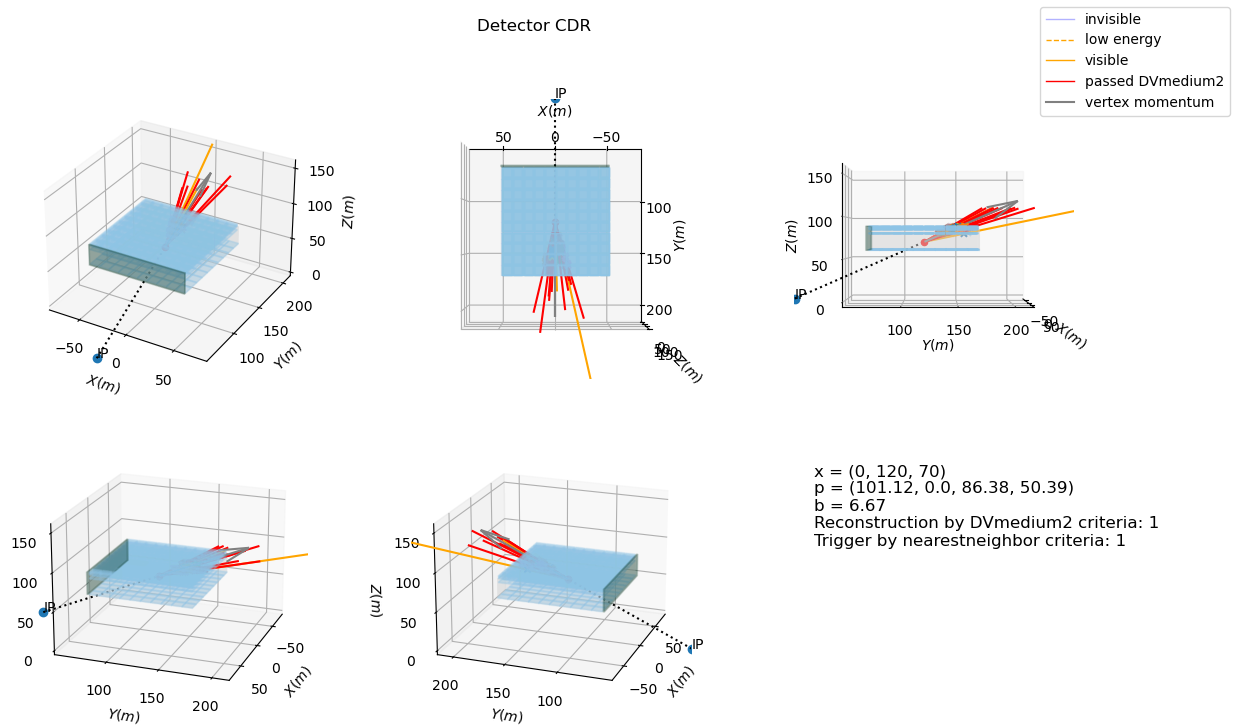

In [49]:
filename = join(os.getcwd(), 'hello_MATHUSLA')
detector_benchmark.detector_display(filename, show = True)

In [52]:
print('Passed DV2:', bool(detector_benchmark.vertex_reconstructed(recon_criteria = 'DVmedium2')))

Passed DV2: True


In [5]:
detector_benchmark = initiate_detector()

In [6]:
fv_path = join(os.getcwd(), "../SimulationData/RHN_Utau_LLPweight4vectorBmesonlist_mN_0.1.csv")
vectors = read_vectors(fv_path, 50)

In [7]:
phi_min, phi_max, theta_min, theta_max = get_detector_angles(detector_benchmark)

  0%|          | 0/50 [00:00<?, ?it/s]

LLP Number: 0
Particle did not enter MATHUSLA
LLP Number: 1
Particle did not enter MATHUSLA
LLP Number: 2


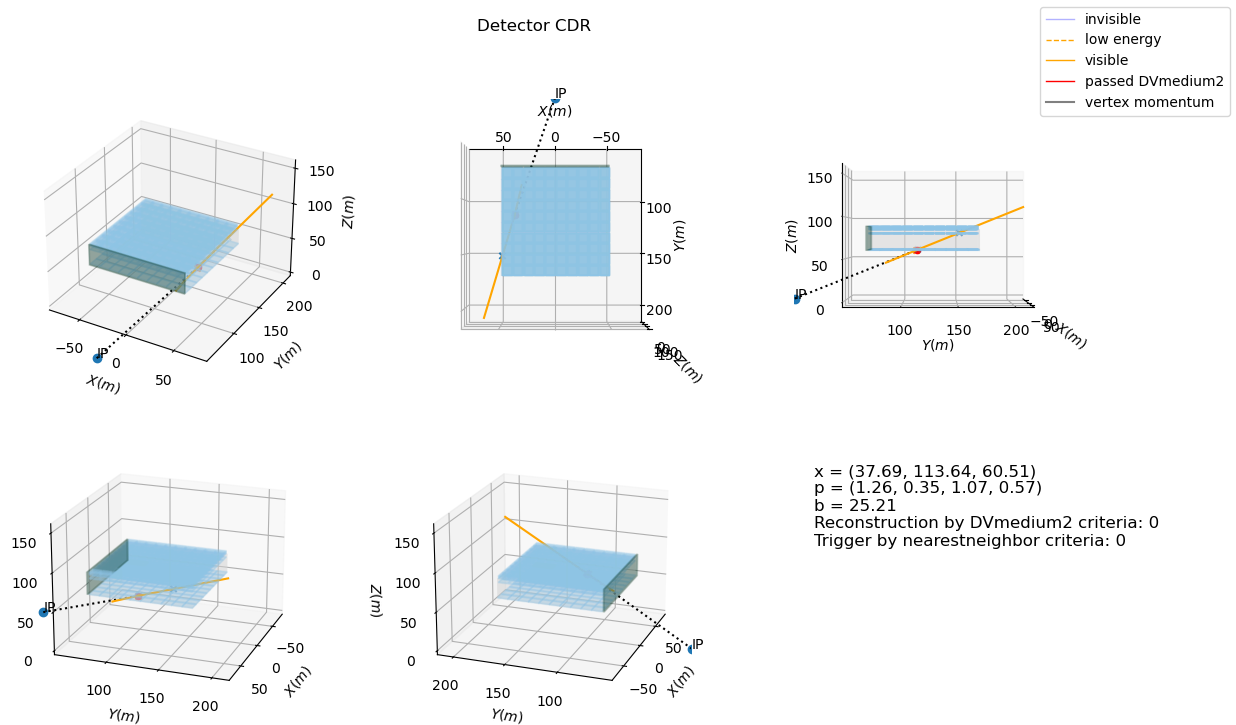

DV2 Criteria: False
DV3 Criteria: False
LLP trigger: False
LLP Number: 3
Particle did not enter MATHUSLA
LLP Number: 4
Particle did not enter MATHUSLA
LLP Number: 5
Particle did not enter MATHUSLA
LLP Number: 6
Particle did not enter MATHUSLA
LLP Number: 7
Particle did not enter MATHUSLA
LLP Number: 8
Particle did not enter MATHUSLA
LLP Number: 9
Particle did not enter MATHUSLA
LLP Number: 10
Particle did not enter MATHUSLA
LLP Number: 11
Particle did not enter MATHUSLA
LLP Number: 12
Particle did not enter MATHUSLA
LLP Number: 13
Particle did not enter MATHUSLA
LLP Number: 14
Particle did not enter MATHUSLA
LLP Number: 15
Particle did not enter MATHUSLA
LLP Number: 16
Particle did not enter MATHUSLA
LLP Number: 17
Particle did not enter MATHUSLA
LLP Number: 18
Particle did not enter MATHUSLA
LLP Number: 19
Particle did not enter MATHUSLA
LLP Number: 20


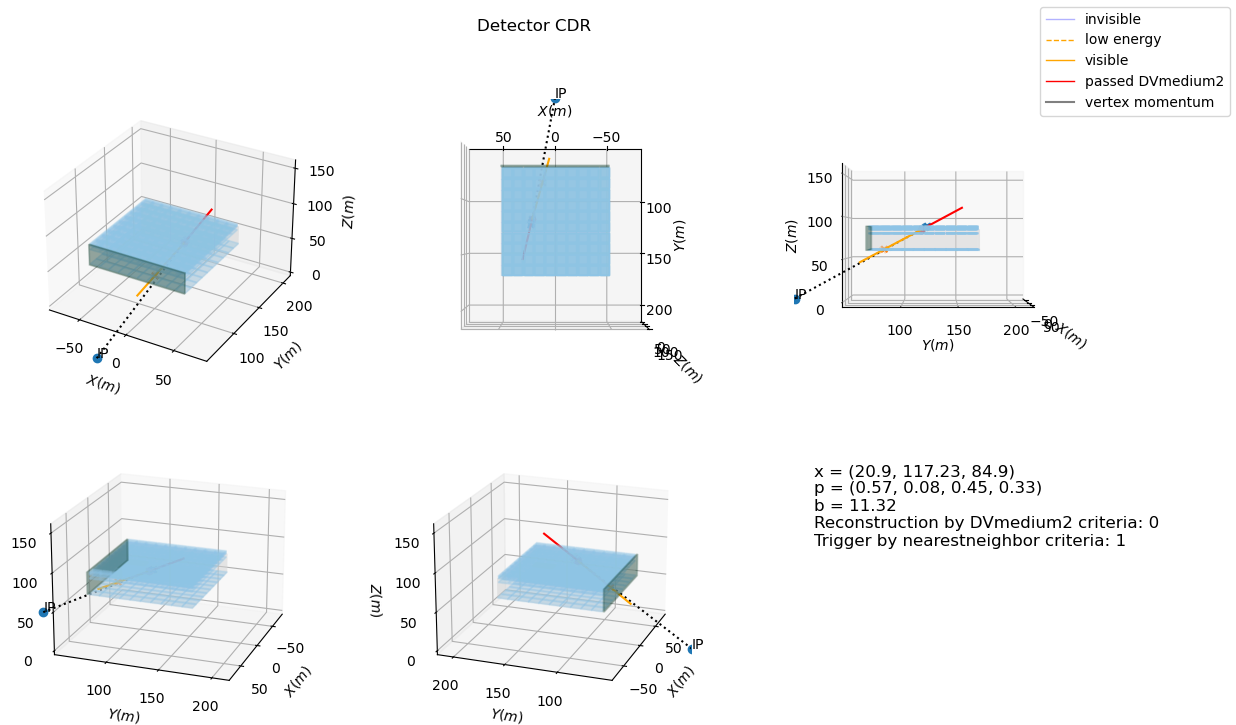

DV2 Criteria: False
DV3 Criteria: False
LLP trigger: True
LLP Number: 21
Particle did not enter MATHUSLA
LLP Number: 22
Particle did not enter MATHUSLA
LLP Number: 23
Particle did not enter MATHUSLA
LLP Number: 24
Particle did not enter MATHUSLA
LLP Number: 25
Particle did not enter MATHUSLA
LLP Number: 26
Particle did not enter MATHUSLA
LLP Number: 27
Particle did not enter MATHUSLA
LLP Number: 28


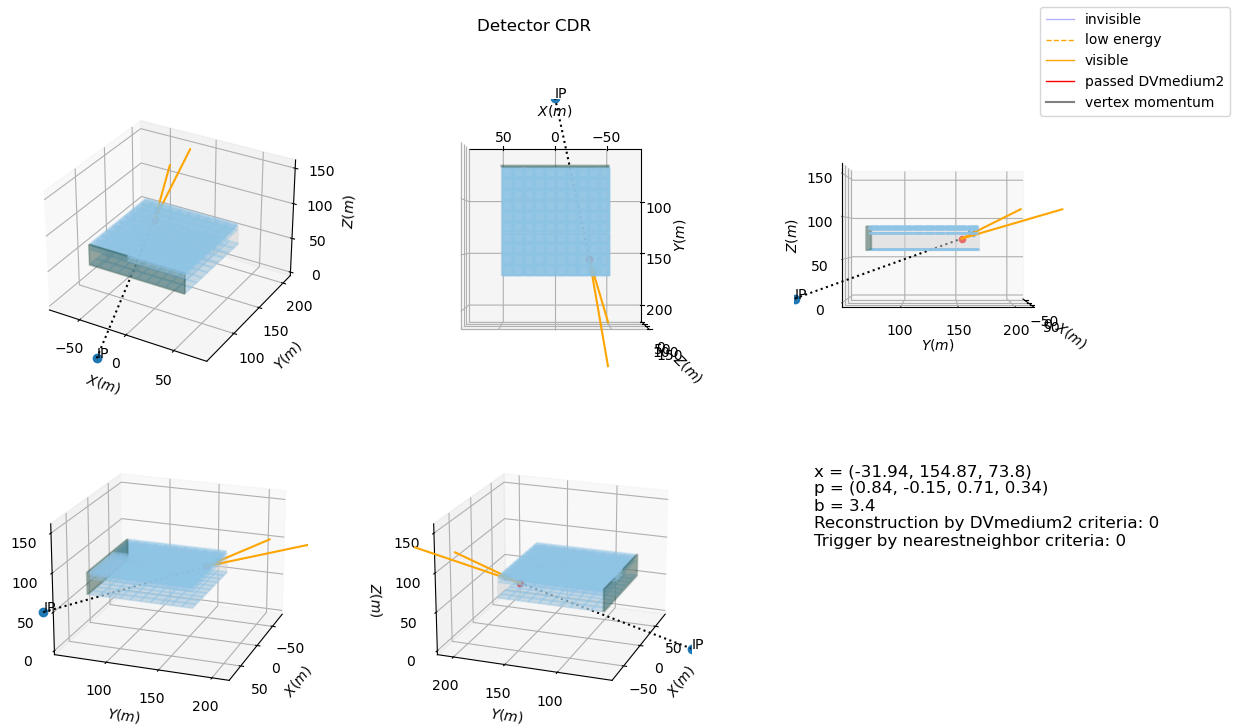

DV2 Criteria: False
DV3 Criteria: False
LLP trigger: False
LLP Number: 29
Particle did not enter MATHUSLA
LLP Number: 30
Particle did not enter MATHUSLA
LLP Number: 31
Particle did not enter MATHUSLA
LLP Number: 32
Particle did not enter MATHUSLA
LLP Number: 33
Particle did not enter MATHUSLA
LLP Number: 34
Particle did not enter MATHUSLA
LLP Number: 35
Particle did not enter MATHUSLA
LLP Number: 36


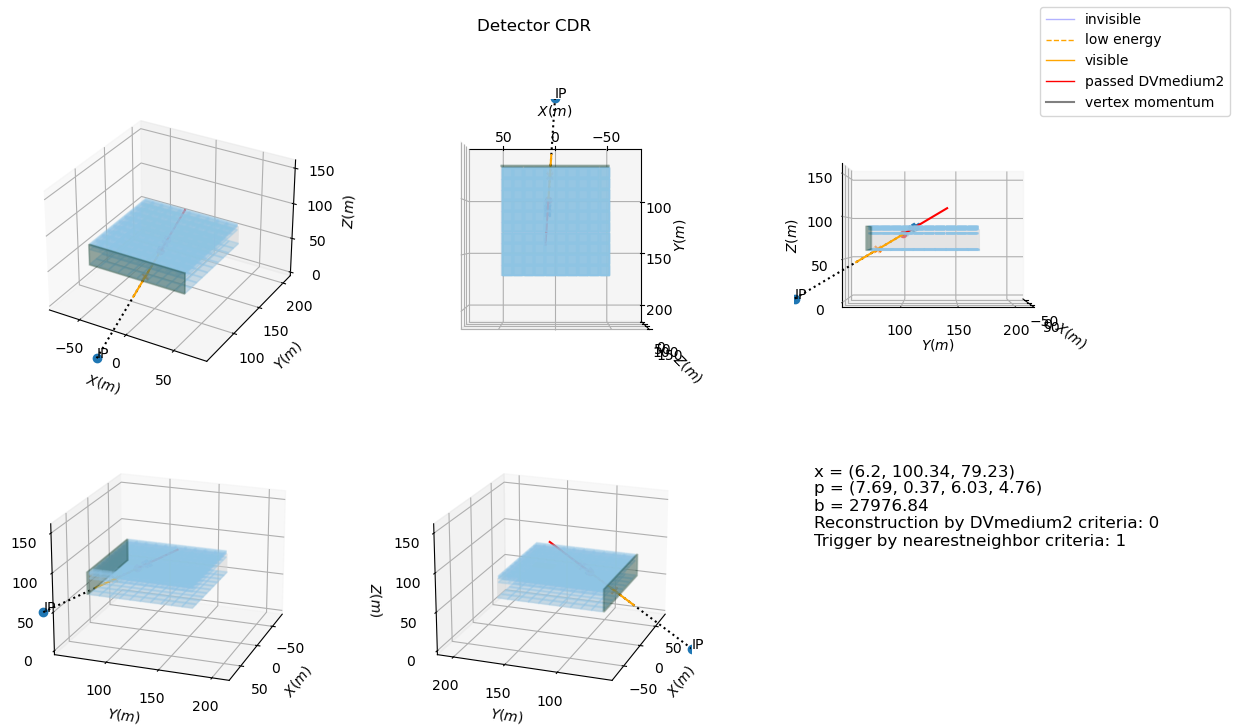

DV2 Criteria: False
DV3 Criteria: False
LLP trigger: True
LLP Number: 37
Particle did not enter MATHUSLA
LLP Number: 38
Particle did not enter MATHUSLA
LLP Number: 39
Particle did not enter MATHUSLA
LLP Number: 40
Particle did not enter MATHUSLA
LLP Number: 41
Particle did not enter MATHUSLA
LLP Number: 42
Particle did not enter MATHUSLA
LLP Number: 43
Particle did not enter MATHUSLA
LLP Number: 44
Particle did not enter MATHUSLA
LLP Number: 45
Particle did not enter MATHUSLA
LLP Number: 46


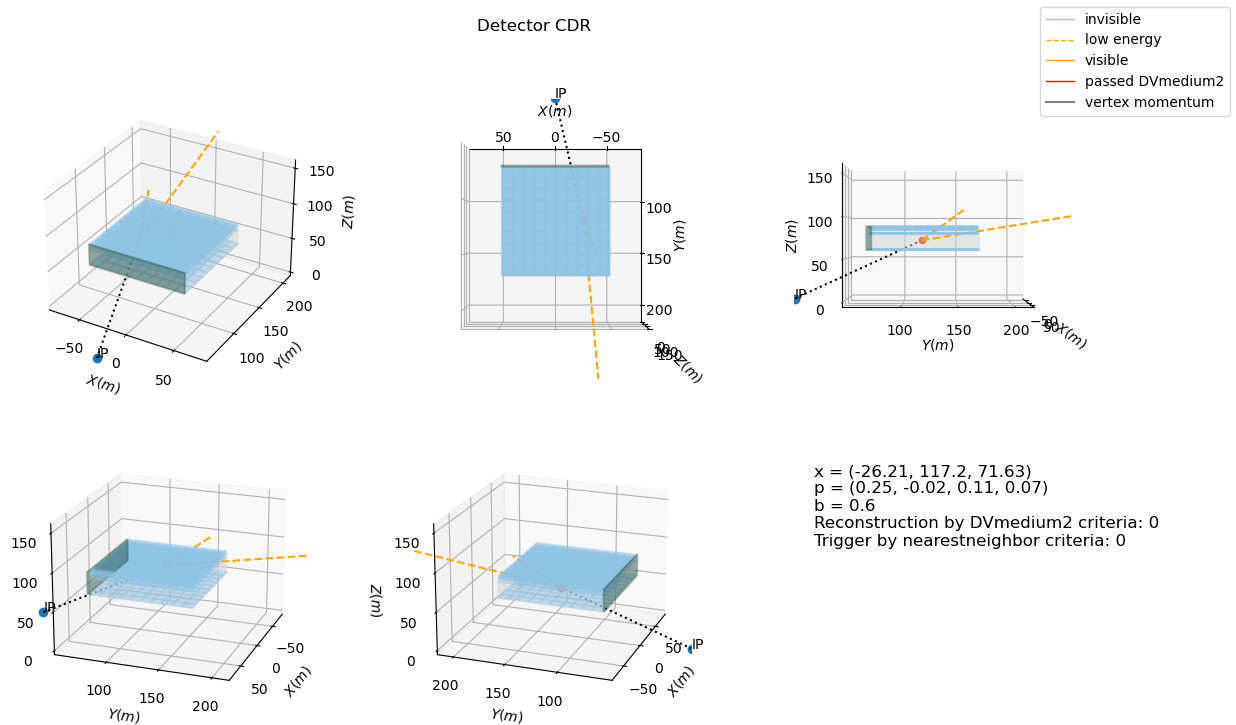

DV2 Criteria: False
DV3 Criteria: False
LLP trigger: False
LLP Number: 47


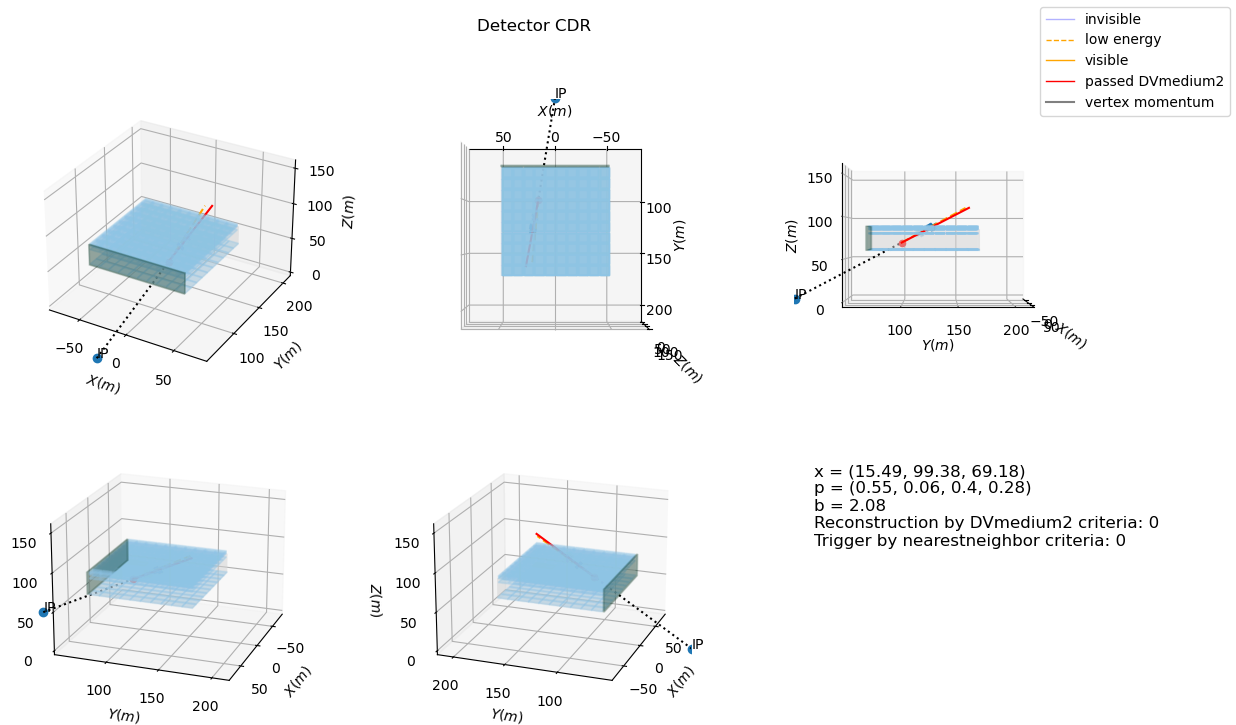

DV2 Criteria: False
DV3 Criteria: False
LLP trigger: False
LLP Number: 48


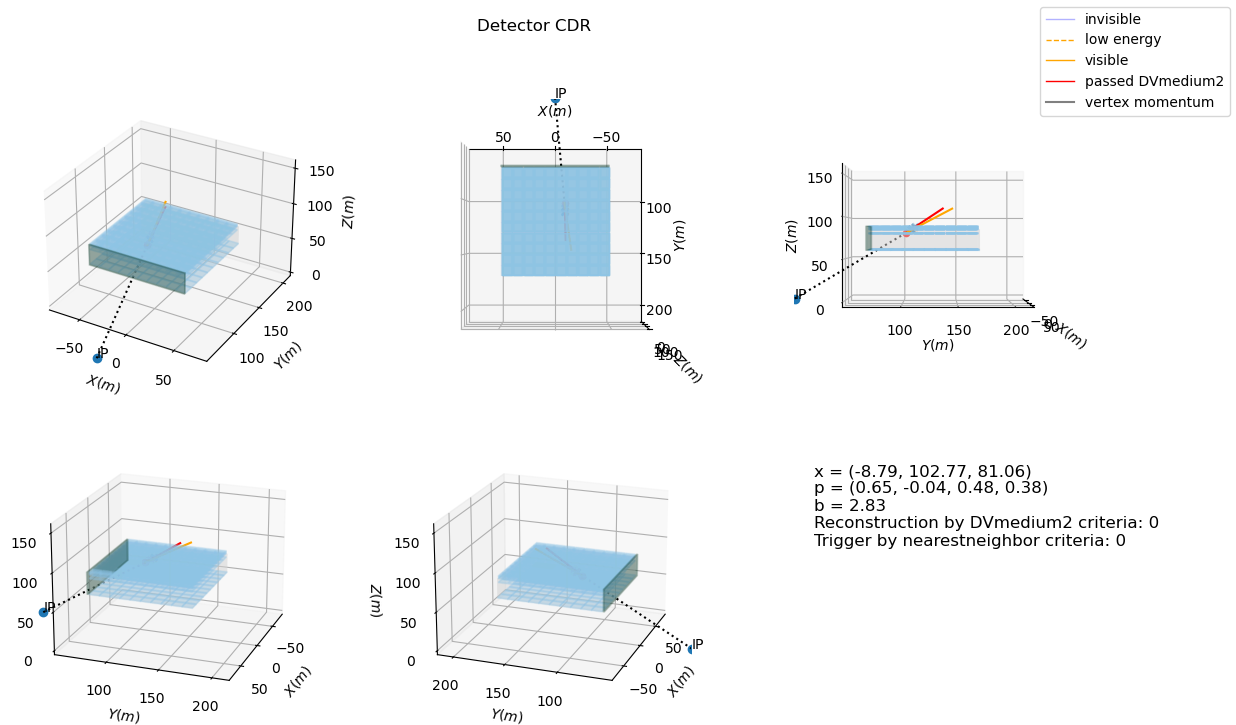

DV2 Criteria: False
DV3 Criteria: False
LLP trigger: False
LLP Number: 49
Particle did not enter MATHUSLA


In [8]:
ctau = 100 #m
mass = 1
for k in tqdm(range(len(vectors))):
    #Tracks Particle Number
    print('LLP Number:', k)
    
    #Extracts mass and momentum for previous data
    mass = vectors[k][0] * 1e-9
    momentum = vectors[k][1:]
    
    #Detemines if polar angle will hit MATHUSLA 
    #Note: tutorial also calculates phi here for no practical reason
    llp_theta = get_theta(momentum[1:])
    
    if (llp_theta < theta_max) and (llp_theta > theta_min):
        detector_benchmark.clear_detector()
        
        #Rotating momentum increases efficiency of code
        rotated_momentum = deal_with_phi(momentum, phi_min, phi_max)
        pack = get_weight(rotated_momentum, mass, ctau, detector_benchmark)
        if pack is not None:
            
            p_decay, p_pos, boost = pack
            
            #llp will be a vertex consisting of an llp and it's decay products
            
            #This code gives hadronic decay
            
            #product_path = join(os.getcwd(), "../MATHUSLA_FastSim/hadrons1to2gev_1.0.txt")
            #llp = lg.get_llp('hadronic_SMS', mass, p_pos, boost, product_path)
            
            llp = lg.get_llp('leptonic2body', mass, p_pos, boost, [13,13])
        
            #Now we need to actually put the particle in the detector
            if llp is not None:
                
                detector_benchmark.new_vertex_event(llp)
                
                outfile = join(os.getcwd(), 'First_Simulation_Graphic')
                detector_benchmark.detector_display(outfile, show = True)
                
                print('DV2 Criteria:', bool(detector_benchmark.vertex_reconstructed(recon_criteria = 'DVmedium2')))
                print('DV3 Criteria:', bool(detector_benchmark.vertex_reconstructed(recon_criteria = 'DVmedium3')))
                print('LLP trigger:', bool(detector_benchmark.event_pass_trigger()))
    
            else:
                print('Invisible Decay')
        #This will catch when get_weight returns None
        else:
            print('Particle did not enter MATHUSLA')
    else:
        print('Particle did not enter MATHUSLA')
        
            
        
        
        

In [73]:
cur_ver = detector_benchmark.return_current_vertex()

In [78]:
cur_ver.get_position

AttributeError: 'DetectorVertex' object has no attribute 'get_position'

In [80]:
help(Detector.DetectorVertex)

Help on class DetectorVertex in module DetectorSimulation.Detector:

class DetectorVertex(builtins.object)
 |  DetectorVertex(vertex: DetectorSimulation.Vertex.Vertex, detector)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, vertex: DetectorSimulation.Vertex.Vertex, detector)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  hit_display(self, ax, hit, module_label)
 |  
 |  track_display(self, ax, recon, zorder)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {'particles': typing.List[DetectorSimulation.Detecto...



In [35]:
file = '../SimulationData/vN_Ntoall_analytical2and3bodydecays_0.1.txt'
path = join(os.getcwd(),file)
lg.load_llp_file(path)

[]